In [4]:
import os
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
files = os.listdir('../final_stats/preprocessed/')


In [6]:
files[:3]

['preprocessed_no_sent_last_1.csv',
 'preprocessed_no_sent_last_10.csv',
 'preprocessed_no_sent_last_3.csv']

### File Retrieval and Preprocessing

In [7]:
from sklearn.preprocessing import MinMaxScaler

def split_target(df, target_col='away_winner_wts'):
    df = df.copy()
    target = df.pop(target_col)
    return df, target

def normalize_df(df):
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    data, target = split_target(df)
    return data, target

def get_data(file):
    df = pd.read_csv(f'../final_stats/preprocessed/{file}', index_col=[0])
    data, target = normalize_df(df)
    return data, target




In [8]:
x, y = get_data(files[0])
x.head()

,away_spread,home_score_team_last_1,home_score_opp_last_1,home_pass_cmp_off_last_1,home_pass_att_off_last_1,home_pass_yds_off_last_1,home_pass_tds_off_last_1,home_ints_off_last_1,home_sacks_off_last_1,home_sacks_yds_off_last_1,...,away_saints,away_seahawks,away_steelers,away_texans,away_titans,away_vikings,day_Sat,day_Sun,day_Thu,away_tie
0,0.412698,0.470588,0.414634,0.515152,0.315789,0.732323,0.75,0.333333,0.428571,0.278689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.365079,0.392157,0.756098,0.636364,0.631579,0.722222,0.75,0.000000,0.142857,0.131148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.904762,0.705882,0.414634,0.575758,0.421053,0.671717,0.75,0.000000,0.142857,0.098361,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.587302,0.392157,0.243902,0.242424,0.263158,0.406566,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.428571,0.000000,0.317073,0.424242,0.421053,0.351010,0.00,0.666667,0.571429,0.442623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Chart Code

In [9]:
def get_average_acc_history(acc_histories):
    num_epochs = len(acc_histories[0])
    return [np.mean([x[i] for x in acc_histories]) for i in range(num_epochs)]

def get_average_loss_history(loss_histories):
    num_epochs = len(loss_histories[0])
    return [np.mean([x[i] for x in loss_histories]) for i in range(num_epochs)]
        
def plot_ave_acc_and_loss_histories(acc_histories, loss_histories):
    average_acc_history = get_average_acc_history(acc_histories)
    average_loss_history = get_average_loss_history(loss_histories)

    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")

    plt.subplot(1, 2, 2)

    plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.show()

def compare_ave_loss_acc_histories(acc_hist_1, acc_hist_2, loss_hist_1, loss_hist_2):
    min_epochs = min(len(acc_hist_1[0]), len(acc_hist_2[0]))
    
    ave_acc_hist_1 = get_average_acc_history(acc_hist_1)
    ave_loss_hist_1 = get_average_loss_history(loss_hist_1)
    
    ave_acc_hist_2 = get_average_acc_history(acc_hist_2)
    ave_loss_hist_2 = get_average_loss_history(loss_hist_2)


    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    epochs = range(1, min_epochs + 1)
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, ave_acc_hist_1, solid_blue_line, label='Model 1')
    plt.plot(epochs, ave_acc_hist_2, solid_red_line, label='Model 2')
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(epochs, ave_loss_hist_1, solid_blue_line, label='Model 1')
    plt.plot(epochs, ave_loss_hist_2, solid_red_line, label='Model 2')
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.legend()
    
    plt.show()
    

In [10]:
import tensorflow as tf
from sklearn.model_selection import KFold

### Base model

In [11]:
def build_model():
    model = tf.keras.Sequential([ 
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [12]:
def build_model_2():
    model = tf.keras.Sequential([ 
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

### K-Fold Cross Validation


#### Option 1 - Base sklearn Pandas example

In [13]:
def run_k_fold(x, y, k, build):
    kf = KFold(n_splits=5, shuffle = True, random_state=99)

    all_scores = []
    for train_i, test_i in kf.split(x):
        x_train, x_test = x.iloc[train_i, :], x.iloc[test_i, :]
        y_train, y_test = y[train_i], y[test_i]
        model = build()
        model.fit(x_train, y_train, epochs = 50, verbose=0)
        val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)
        all_scores.append(val_accuracy)
    print(all_scores)
    print(f"Average Accuracy for {k} Folds: ", np.average(all_scores))


run_k_fold(x, y, 5, build_model_2)

[0.5714285969734192, 0.4761904776096344, 0.7142857313156128, 0.4761904776096344, 0.4761904776096344]
Average Accuracy for 5 Folds:  0.542857152223587


#### Option 2 - DLWP Example
Use average validation loss and average validation accuracy accross each fold and plot that to determine where overfitting occurs

In [14]:
def get_max_ave_acc_min_ave_loss(acc_histories, loss_histories):
    num_epochs = len(acc_histories[0])
    average_acc_history = [
        np.mean([x[i] for x in acc_histories]) for i in range(num_epochs)
    ]
    index_acc = np.argmax(average_acc_history)
    max_acc = round(average_acc_history[index_acc]*100,2)
    print(f'\nMax Average Accuracy: {max_acc}% \t Num Epochs: {index_acc + 1} ')

    average_loss_history = [
        np.mean([x[i] for x in loss_histories]) for i in range(num_epochs)
    ]
    index_loss = np.argmin(average_loss_history)
    min_loss = round(average_loss_history[index_loss], 2)
    print(f'Min Average Loss: {min_loss} \t Num Epochs: {index_loss + 1} ')
    return

In [15]:
def run_k_fold2(x, y, k, num_epochs, build_m):
    num_val_samples = len(x) // k
    all_scores = [] 
    all_histories = []
    acc_histories = []
    loss_histories = []
    for i in range(k):
        print(f"Processing fold #{i}")
        val_data = x[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
        partial_x = np.concatenate(
                [x[:i * num_val_samples],
                x[(i + 1) * num_val_samples:]],
                axis=0
            )
        partial_y = np.concatenate(
                [y[:i * num_val_samples],
                y[(i + 1) * num_val_samples:]],
                axis=0
            )
        model = build_m()
        history = model.fit(
                partial_x, partial_y, 
                validation_data=(val_data, val_targets),
                epochs=num_epochs, batch_size=16, verbose=0
            )
        all_histories.append(history.history)
        acc_history = history.history['val_accuracy']
        loss_history = history.history['val_loss']
        acc_histories.append(acc_history)
        loss_histories.append(loss_history)
    get_max_ave_acc_min_ave_loss(acc_histories, loss_histories)
    plot_ave_acc_and_loss_histories(acc_histories, loss_histories)
    return all_histories, acc_histories, loss_histories

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4

Max Average Accuracy: 59.05% 	 Num Epochs: 27 
Min Average Loss: 0.69 	 Num Epochs: 12 


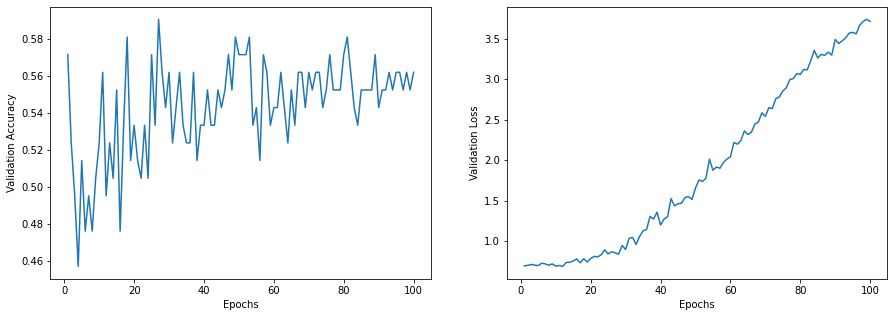

In [97]:
all_histories1, acc_histories1, loss_histories1 = run_k_fold2(x , y, 5, 100, build_model)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3

Max Average Accuracy: 58.65% 	 Num Epochs: 5 
Min Average Loss: 0.69 	 Num Epochs: 2 


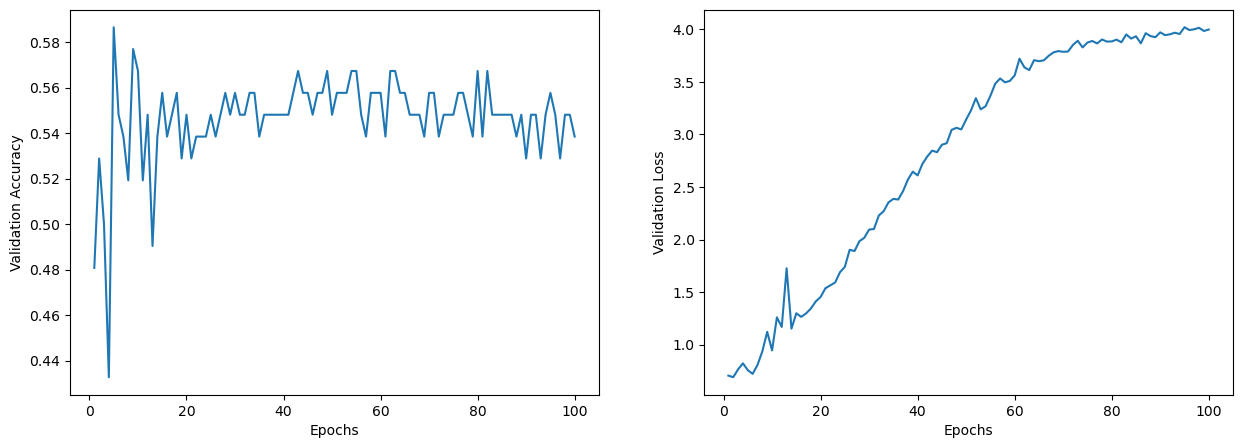

In [16]:
all_histories2, acc_histories2, loss_histories2 = run_k_fold2(x , y, 4, 100, build_model_2)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4

Max Average Accuracy: 57.14% 	 Num Epochs: 9 
Min Average Loss: 0.72 	 Num Epochs: 1 


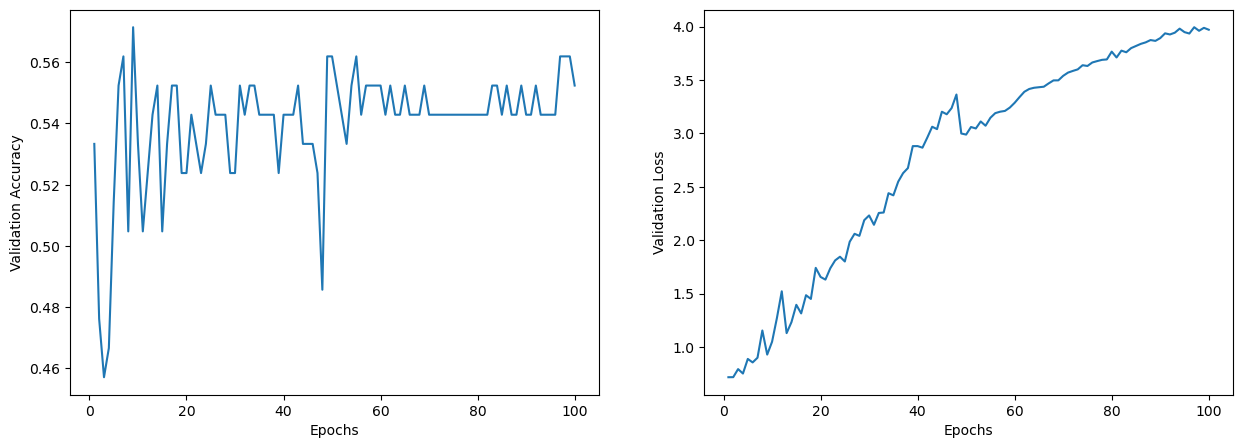

In [17]:
all_histories2a, acc_histories2a, loss_histories2a = run_k_fold2(x , y, 5, 100, build_model_2)



Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4
Processing fold #5
Processing fold #6
Processing fold #7
Processing fold #8
Processing fold #9

Max Average Accuracy: 57.0% 	 Num Epochs: 9 
Min Average Loss: 0.73 	 Num Epochs: 2 


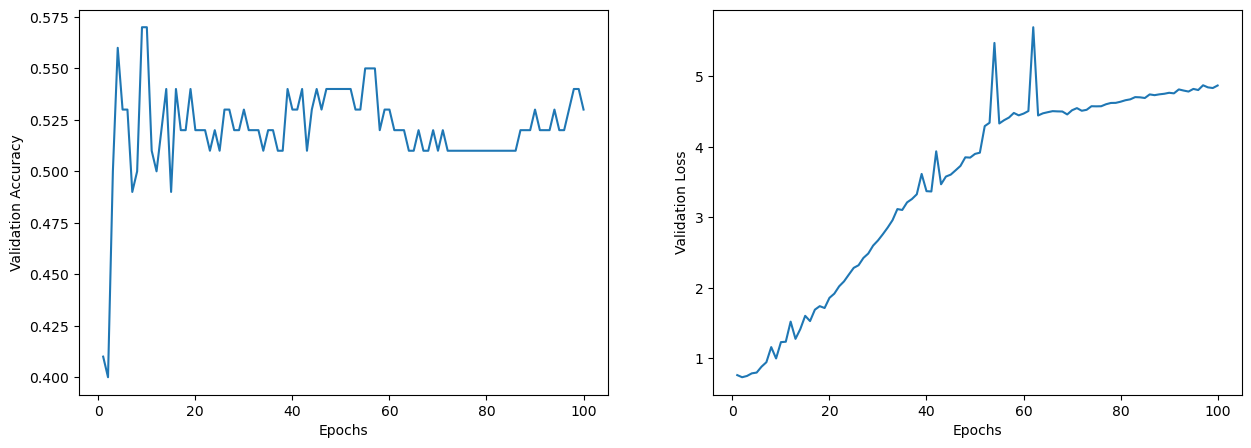

In [18]:
all_histories2b, acc_histories2b, loss_histories2b = run_k_fold2(x , y, 10, 100, build_model_2)

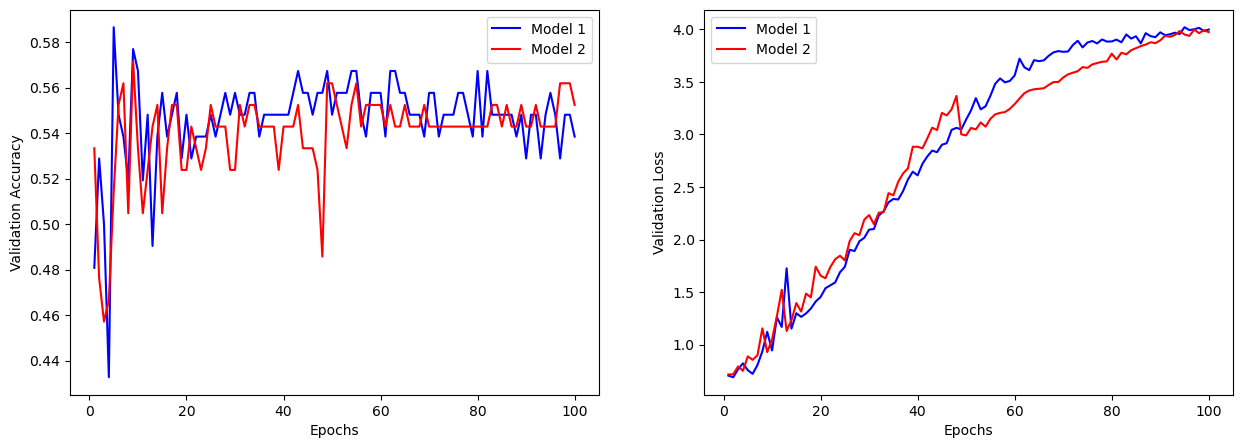

In [19]:
compare_ave_loss_acc_histories(acc_histories2, acc_histories2a, loss_histories2, loss_histories2a)

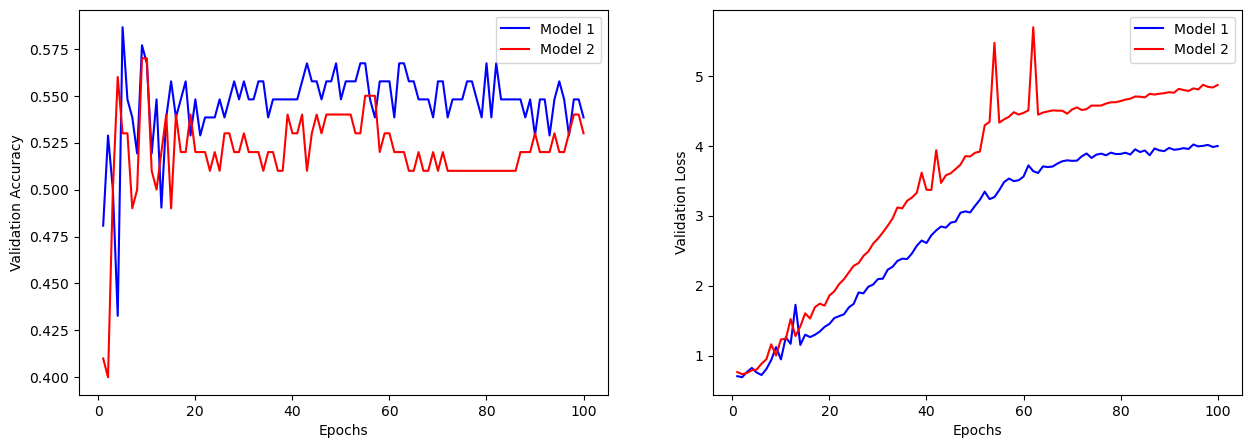

In [20]:
compare_ave_loss_acc_histories(acc_histories2, acc_histories2b, loss_histories2, loss_histories2b)

### Run for every dataset on base model??


In [103]:
# for file in files
files

['preprocessed_no_sent_last_1.csv',
 'preprocessed_no_sent_last_10.csv',
 'preprocessed_no_sent_last_3.csv',
 'preprocessed_no_sent_last_5.csv',
 'preprocessed_no_sent_last_7.csv',
 'preprocessed_sent_24_last_1.csv',
 'preprocessed_sent_24_last_10.csv',
 'preprocessed_sent_24_last_3.csv',
 'preprocessed_sent_24_last_5.csv',
 'preprocessed_sent_24_last_7.csv',
 'preprocessed_sent_96_last_1.csv',
 'preprocessed_sent_96_last_10.csv',
 'preprocessed_sent_96_last_3.csv',
 'preprocessed_sent_96_last_5.csv',
 'preprocessed_sent_96_last_7.csv',
 'preprocessed_sent_cross_last_1.csv',
 'preprocessed_sent_cross_last_10.csv',
 'preprocessed_sent_cross_last_3.csv',
 'preprocessed_sent_cross_last_5.csv',
 'preprocessed_sent_cross_last_7.csv']

### Old Chart Code Functions

In [63]:
def plot_train_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def plot_train_val_acc(history):
    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
        
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
        
    plt.plot(epochs, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

def plot_train_val_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)
    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    # plt.plot(epochs_range, acc, label='Training Accuracy')
    # plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    
 
    plt.plot(epochs_range, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs_range, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, blue_dots, label='Training Loss')
    plt.plot(epochs_range, val_loss, solid_blue_line, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
  
def compare_loss_and_acc(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['loss']), len(hist2.history['loss']))
    
    train_loss_1 = hist1['loss'][:min_epochs]
    val_loss_1 = hist1['val_loss'][:min_epochs]

    train_loss_2 = hist2['loss'][:min_epochs]
    val_loss_2 = hist2['val_loss'][:min_epochs]


    train_acc_1 = hist1['accuracy'][:min_epochs]
    val_acc_1 = hist1['val_accuracy'][:min_epochs]

    train_acc_2 = hist2['accuracy'][:min_epochs]
    val_acc_2 = hist2['val_accuracy'][:min_epochs]

    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)

    plt.plot(epochs, train_loss_1, blue_dots, label = f'{title1} Training Loss')
    plt.plot(epochs, val_loss_1, solid_blue_line, label = f'{title1} Validation Loss')
    plt.plot(epochs, train_loss_2, red_dots, label = f'{title2} Training Loss')
    plt.plot(epochs, val_loss_2, solid_red_line, label = f'{title2} Validation Loss')
    # plt.title('Loss With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc_1, blue_dots, label = f'{title1} Training Accuracy')
    plt.plot(epochs, val_acc_1, solid_blue_line, label = f'{title1} Validation Accuracy')
    plt.plot(epochs, train_acc_2, red_dots, label = f'{title2} Training Accuracy')
    plt.plot(epochs, val_acc_2, solid_red_line, label = f'{title2} Validation Accuracy')
    # plt.title('Accuracy With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.show()

def compare_acc(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['accuracy']), len(hist2.history['accuracy']))
    acc = hist1.history['accuracy'][:min_epochs]
    val_acc = hist1.history['val_accuracy'][:min_epochs]
    acc_drop = hist2.history['accuracy'][:min_epochs]
    val_acc_drop = hist2.history['val_accuracy'][:min_epochs]
    
    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.plot(epochs, acc, blue_dots, label = f'{title1} Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = f'{title1} Validation Accuracy')
    plt.plot(epochs, acc_drop, red_dots, label = f'{title2} Training Accuracy')
    plt.plot(epochs, val_acc_drop, solid_red_line, label = f'{title2} Validation Accuracy')
    # plt.title('Accuracy With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()